In [267]:
#importing all the necessary librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns
%matplotlib inline

In [268]:
#importing dataset
df = pd.read_csv('C:\\Users\\91701\\Downloads\\archive (10).zip')

## Understanding the data

In [269]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [270]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [271]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [272]:
df.shape

(13320, 9)

In [273]:
df.ndim

2

In [274]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [276]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Statistics of data

In [277]:
#let us see some statistics
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Cleaning the data ( Data Preprocessing )

In [278]:
#checking null values are there or not
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [279]:
df.isnull().any()

area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

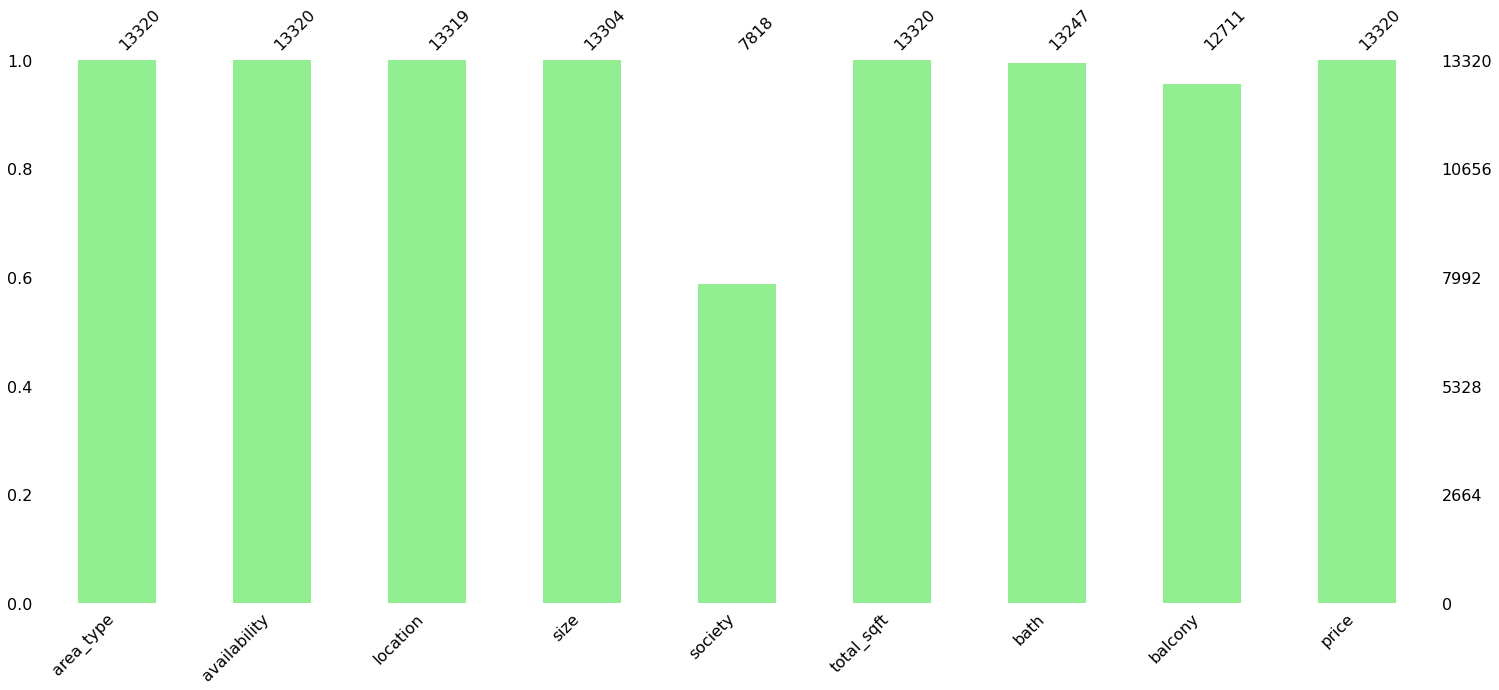

In [280]:
mns.bar(df,color='lightgreen')
plt.show()

In [281]:
#for more accuracy let us delete the null rows
df = df.dropna()

In [282]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00


In [283]:
df.shape

(7496, 9)

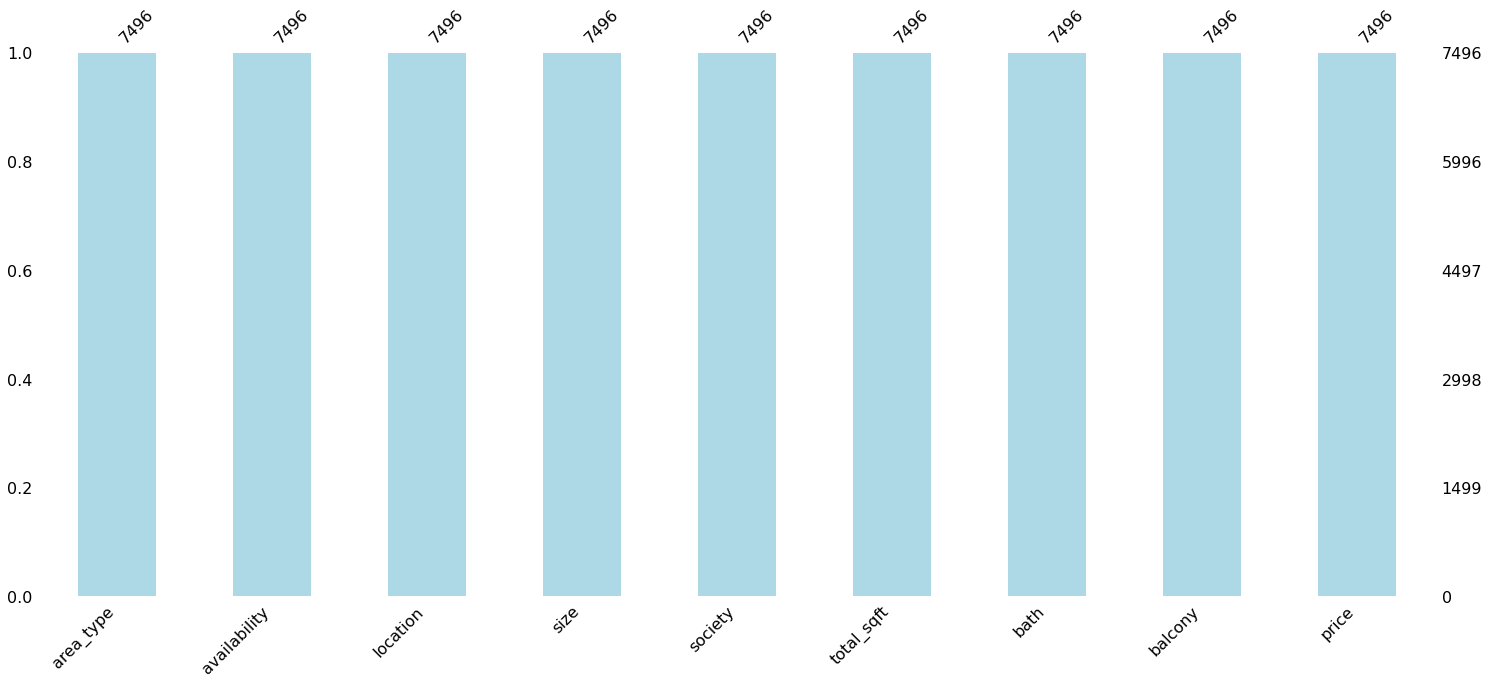

In [284]:
mns.bar(df,color='lightblue')
plt.show()
#so that we can say there are no null values in the data frame

In [285]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [286]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [287]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


# EXPLORATARY DATA ANALYSIS

In [288]:
df['balcony'].value_counts()

2.0    3114
1.0    2975
3.0    1005
0.0     402
Name: balcony, dtype: int64

In [289]:
df['bath'].value_counts()

2.0    4283
3.0    2063
4.0     458
1.0     428
5.0     184
6.0      73
7.0       4
9.0       3
Name: bath, dtype: int64

In [290]:
df['price'].describe()

count    7496.000000
mean       96.857122
std       105.382490
min         8.000000
25%        49.500000
50%        69.755000
75%       105.000000
max      2700.000000
Name: price, dtype: float64

In [291]:
df.groupby('area_type').mean()

,bath,balcony,price,bhk
area_type,,,,
Built-up Area,2.392055,1.591537,90.443074,2.521589
Carpet Area,2.365385,1.288462,74.613558,2.423077
Plot Area,3.721190,1.795539,281.134275,3.579926
Super built-up Area,2.415489,1.632874,90.045352,2.484959


In [292]:
#rather than seeing by this if we see some sort of visualization techniques it would be more better

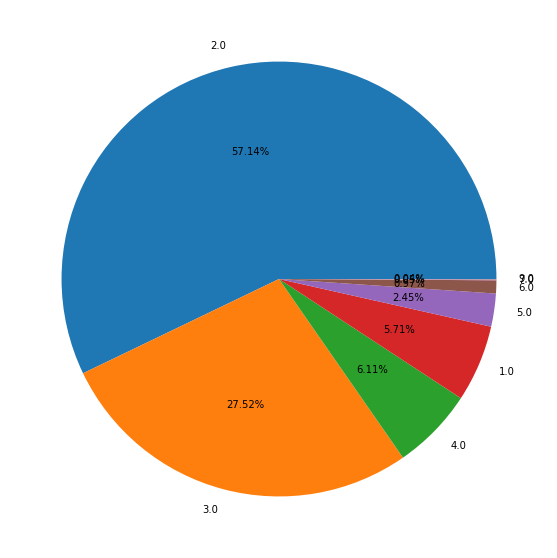

In [293]:
x = df['bath'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(x,labels=[2.0,3.0,4.0,1.0,5.0,6.0,7.0,9.0],autopct='%1.2f%%')
plt.show()

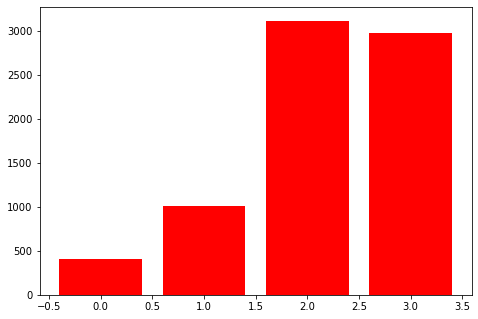

In [294]:
x = [2.0,3.0,1.0,0.0]
y = df['balcony'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y,color='r')
plt.show()

In [295]:
df['area_type'].value_counts()

Super built-up  Area    6017
Built-up  Area          1158
Plot  Area               269
Carpet  Area              52
Name: area_type, dtype: int64

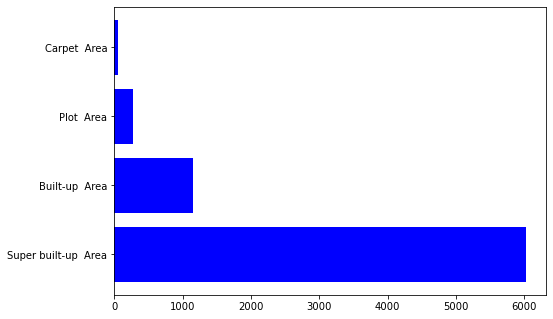

In [296]:
x = ['Super built-up  Area','Built-up  Area','Plot  Area','Carpet  Area']
y = df['area_type'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(x,y,color='b')
plt.show()

In [297]:
df['price'].describe()

count    7496.000000
mean       96.857122
std       105.382490
min         8.000000
25%        49.500000
50%        69.755000
75%       105.000000
max      2700.000000
Name: price, dtype: float64

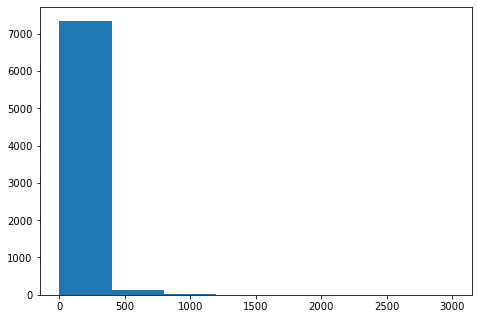

In [298]:
x = np.array(df['price'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(x,bins=[0,400,800,1200,1600,2000,2500,3000])
plt.show()

**Corelation between the variables**

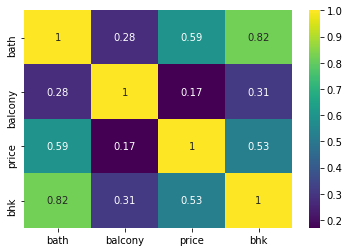

In [299]:

sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

In [300]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


In [301]:
#let us drop some columns
df.drop(columns=['availability','society','location'],inplace=True)

In [302]:
df.head()

,area_type,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00,4
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00,3
5,Super built-up Area,2 BHK,1170,2.0,1.0,38.00,2
11,Plot Area,4 Bedroom,2785,5.0,3.0,295.00,4


In [303]:
df = df.drop(columns = 'size')

In [304]:
df.head()

,area_type,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1056,2.0,1.0,39.07,2
1,Plot Area,2600,5.0,3.0,120.00,4
3,Super built-up Area,1521,3.0,1.0,95.00,3
5,Super built-up Area,1170,2.0,1.0,38.00,2
11,Plot Area,2785,5.0,3.0,295.00,4


In [305]:
df['area_type'].value_counts()

Super built-up  Area    6017
Built-up  Area          1158
Plot  Area               269
Carpet  Area              52
Name: area_type, dtype: int64

# **Label Encoding**

**Converting the categorical values into numerical values**

In [306]:

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.area_type = label.fit_transform(df.area_type)

In [307]:
df.head()

,area_type,total_sqft,bath,balcony,price,bhk
0,3,1056,2.0,1.0,39.07,2
1,2,2600,5.0,3.0,120.00,4
3,3,1521,3.0,1.0,95.00,3
5,3,1170,2.0,1.0,38.00,2
11,2,2785,5.0,3.0,295.00,4


**Here there are some problems in the column of total_sqft**

In [308]:
#let us convert the price for all sqft
x = df['total_sqft']
y = df['price']
print(x.dtypes)
print(y.dtypes)

object
float64


In [309]:
df['total_sqft'].unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [310]:
#there are some values like 2100-2850 to overcome that we write a function
def convert_to_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [311]:
df1=df[~df['total_sqft'].apply(convert_to_float)].head(20)

In [312]:
df1.head()

,area_type,total_sqft,bath,balcony,price,bhk
30,3,2100 - 2850,4.0,0.0,186.000,4
122,3,3067 - 8156,4.0,0.0,477.000,4
137,3,1042 - 1105,2.0,0.0,54.005,2
165,3,1145 - 1340,2.0,0.0,43.490,2
188,3,1015 - 1540,2.0,0.0,56.800,2


In [313]:
def convert(x):
    y = x.split('-')
    if (len(y)==3):
        return float(y[0])+float(y[2])/2
    try:
        return float(x[0:4])
    except:
        return None

In [314]:
df2 = df.copy()
df2.head()

,area_type,total_sqft,bath,balcony,price,bhk
0,3,1056,2.0,1.0,39.07,2
1,2,2600,5.0,3.0,120.00,4
3,3,1521,3.0,1.0,95.00,3
5,3,1170,2.0,1.0,38.00,2
11,2,2785,5.0,3.0,295.00,4


In [315]:
df2['total_sqft']=df['total_sqft'].apply(convert)

In [316]:
df2.isna().sum()

area_type     0
total_sqft    5
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [317]:
df2 = df2.dropna()

In [318]:
y = df2['price']

In [319]:
df2.pop('price')

0         39.07
1        120.00
3         95.00
5         38.00
11       295.00
          ...  
13313     57.00
13314    112.00
13315    231.00
13317     60.00
13318    488.00
Name: price, Length: 7491, dtype: float64

In [320]:
x = df2.iloc[:,:]

# Model building
**Splitting the data**

**Giving appropriate machine learning algorithm**

In [321]:
from sklearn.model_selection import train_test_split

In [327]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [328]:
from sklearn.linear_model import LinearRegression

In [329]:
regressor = LinearRegression()

In [330]:
regressor.fit(x_train,y_train)

LinearRegression()

In [331]:
regressor.score(x_test,y_test)

0.5869103785039111

**Here is error is quite low because we have to do feature scaling and outlier detection**

**we can also check by r2_score matrix**

In [332]:
from sklearn.metrics import r2_score

In [333]:
y_pred_test = regressor.predict(x_test)

In [334]:
r2_score(y_test,y_pred_test)

0.5869103785039111